In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
df = pd.read_csv('../data/processed/processed_abalone_data_with_sex.csv')
X_train, X_test, y_train, y_test = train_test_split(df, df['Age'], test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train_features = X_train.drop(columns=['Age'])
X_val_features = X_val.drop(columns=['Age'])
X_test_features = X_test.drop(columns=['Age'])


In [24]:
model = LinearRegression()
model.fit(X_train_features, y_train)

y_val_pred = model.predict(X_val_features)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
print(f'Validation Mean squared error: {mse_val}')
print(f'Validation R2 score: {r2_val}')


y_test_pred = model.predict(X_test_features)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'Test Mean squared error: {mse_test}')
print(f'Test R2 score: {r2_test}')

Validation Mean squared error: 4.8221294696514425
Validation R2 score: 0.5755314025758809
Test Mean squared error: 4.7741566829894335
Test R2 score: 0.5298508354159419


In [19]:
test_value = pd.DataFrame({
    'Length': [0.5],  ## why infant abalone have 0.5 length???
    'Diameter': [0.4], ## ??
    'Height': [0.1], 
    'Whole weight':[0.4], 
    'Shucked weight': [0.15], 
    'Viscera weight': [0.08], 
    'Shell weight':[0.13], 
    'Sex_F': [0], 
    'Sex_I': [1],
    'Sex_M': [0]})

model.predict(test_value)

array([15.5859375])

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth' : [4, 5, 6, 7, 8]
}


rf = RandomForestRegressor()


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train_features, y_train)

print("Best parameters found: ", grid_search.best_params_)



Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV] END ...max_depth=4, max_features=None, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=4, max_features=None, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=4, max_features=None, n_estimators=100; total time=   0.2s
[CV] END ...max_depth=4, max_features=None, n_estimators=200; total time=   0.4s
[CV] END ...max_depth=4, max_features=None, n_estimators=200; total time=   0.4s
[CV] END ...max_depth=4, max_features=None, n_estimators=200; total time=   0.4s
[CV] END ...max_depth=4, max_features=None, n_estimators=300; total time=   0.5s
[CV] END ...max_depth=4, max_features=None, n_estimators=300; total time=   0.5s
[CV] END ...max_depth=4, max_features=None, n_estimators=300; total time=   0.5s
[CV] END ...max_depth=4, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=4, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=4, max_features=sqrt, n_e

In [21]:
best_params = grid_search.best_params_


best_model = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                max_features=best_params['max_features'],
                                max_depth=best_params['max_depth'],
                                random_state=42)


best_model.fit(X_train_features, y_train)

RandomForestRegressor(max_depth=8, max_features=None, random_state=42)

In [22]:
y_test_pred = best_model.predict(X_test_features)

mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE: {mse}")
print(f"Test R²: {r2}")


Test MSE: 4.731073929484914
Test R²: 0.534093536674638


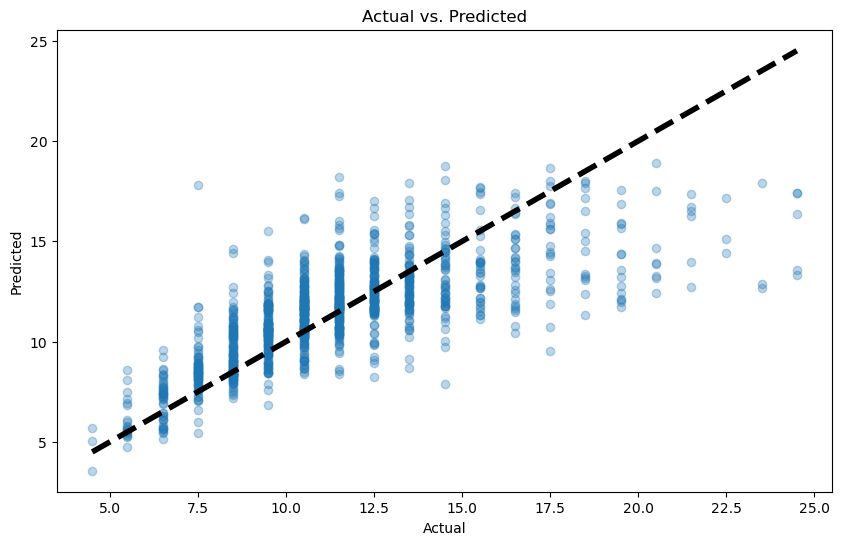

In [23]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()
